使用trensorflow搭建卷积神经网络

In [1]:
#卷积神经网络
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']="SimHei"
plt.rcParams['axes.unicode_minus']=False

设置GPU个数与显存

In [2]:
#调用GPU进行训练准备
tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


导入数据集CIFAR-10

In [3]:
#导入CIFAR-10数据集并进行处理
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

搭建CNN模型

In [4]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(32,32,3)),
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(2,2),activation="softsign"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="softsign"),
    tf.keras.layers.Dense(10)]
    )#Sequential是一个容器，描述了神经网络的结构
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 32)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 2, 2, 64)         0

训练模型

In [5]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
record=model.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels))
test_loss,test_acc=model.evaluate(test_images, test_labels)

Epoch 1/20
1563/1563 [==============================] - 13s 4ms/step - loss: 1.6108 - accuracy: 0.4081 - val_loss: 1.4178 - val_accuracy: 0.4790
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3002 - accuracy: 0.5333 - val_loss: 1.2515 - val_accuracy: 0.5607
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1623 - accuracy: 0.5872 - val_loss: 1.1051 - val_accuracy: 0.6077
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0697 - accuracy: 0.6232 - val_loss: 1.0494 - val_accuracy: 0.6240
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0004 - accuracy: 0.6501 - val_loss: 0.9961 - val_accuracy: 0.6477
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9403 - accuracy: 0.6716 - val_loss: 0.9733 - val_accuracy: 0.6637
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8951 - accuracy: 0.6866 - val_loss: 0.9808 - val_accuracy

损失以及正确率可视化

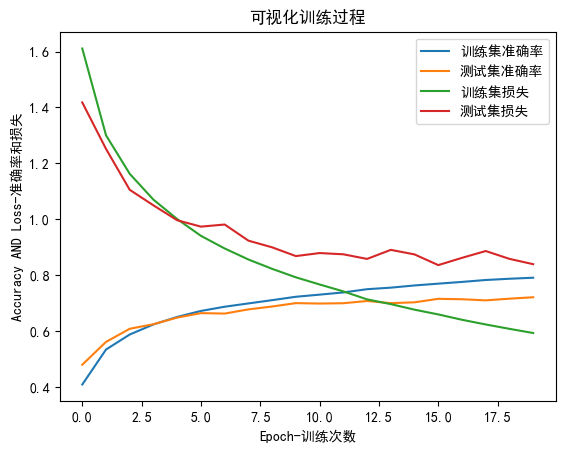

In [6]:
plt.plot(record.history["accuracy"],label="训练集准确率")
plt.plot(record.history["val_accuracy"],label="测试集准确率")
plt.plot(record.history["loss"],label="训练集损失")
plt.plot(record.history["val_loss"],label="测试集损失")
plt.xlabel("Epoch-训练次数")
plt.ylabel("Accuracy AND Loss-准确率和损失")
plt.title("可视化训练过程")
plt.legend()

In [7]:
print(test_acc)

0.7204999923706055


手写数字数据集mnist

(60000, 28, 28)
(10000, 28, 28)


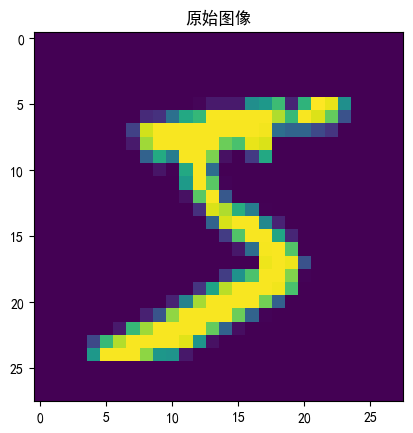

In [8]:
#载入MNIST手写数字数据集
(Mtrain_images, Mtrain_labels), (Mtest_images, Mtest_labels) = tf.keras.datasets.mnist.load_data()
#查看MNIST的数据内容与格式
print(Mtrain_images.shape)
print(Mtest_images.shape)
plt.imshow(Mtrain_images[0])
plt.title("原始图像")
plt.show()

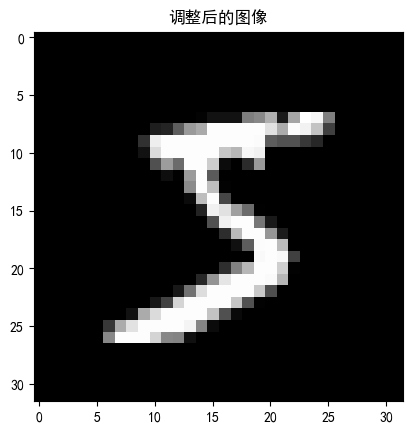

In [9]:
#对MNIST数据进行处理
Mtrain_images=np.pad(Mtrain_images,((0,0),(2,2),(2,2)))#对图像周围补零，扩大图像尺寸
Mtrain_images_3 = np.stack((Mtrain_images, Mtrain_images, Mtrain_images), axis=3)#升维，色彩通道数变为3

Mtest_images=np.pad(Mtest_images,((0,0),(2,2),(2,2)))
Mtest_images_3 = np.stack((Mtest_images, Mtest_images,Mtest_images), axis=3)#升维，色彩通道数变为3

plt.imshow(Mtrain_images_3[0])
plt.title("调整后的图像")
plt.show()

In [10]:
#使用model对MNIST进行验证
test_loss,test_acc=model.evaluate(Mtrain_images_3, Mtrain_labels)
print(test_loss,test_acc)

1875/1875 [==============================] - 4s 2ms/step - loss: 5.5959 - accuracy: 0.0509
5.595890998840332 0.05094999819993973


使用mnist重新优化model

In [11]:
#使用MNIST数据集对模型进行训练
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
M_record=model.fit(Mtrain_images_3,Mtrain_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7148 - accuracy: 0.7721
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3880 - accuracy: 0.8764
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3315 - accuracy: 0.8968
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2744 - accuracy: 0.9133
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2585 - accuracy: 0.9191
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2168 - accuracy: 0.9318
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2602 - accuracy: 0.9188
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2274 - accuracy: 0.9283
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2039 - accuracy: 0.9363
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.178

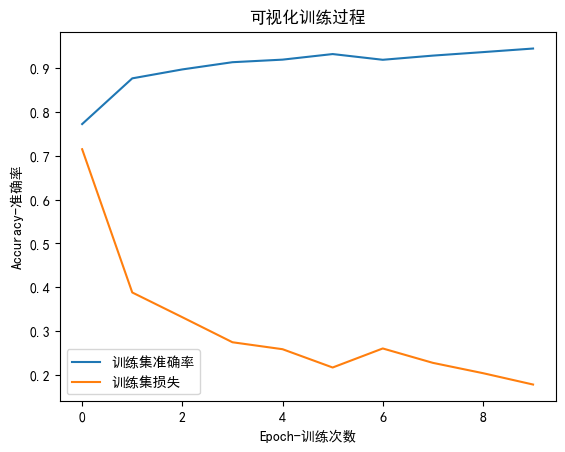

In [12]:
plt.plot(M_record.history["accuracy"],label="训练集准确率")
plt.plot(M_record.history["loss"],label="训练集损失")
plt.xlabel("Epoch-训练次数")
plt.ylabel("Accuracy-准确率")
plt.title("可视化训练过程")
plt.legend()
plt.show()

In [13]:
#验证
test_loss,test_acc=model.evaluate(Mtest_images_3, Mtest_labels)
print("准确率：",test_acc,"损失：",test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1540 - accuracy: 0.9520
准确率： 0.9520000219345093 损失： 0.15398147702217102


In [14]:
layer_names = [layer.name for layer in model.layers]
layer_names
layer_outputs = [layer.output for layer in model.layers]
feature_map_model = tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)

x=train_images[1]
input = x.reshape((1,) + x.shape)
input /= 255.0 

feature_maps = feature_map_model.predict(input)

for layer_name, feature_map in zip(layer_names, feature_maps):
  print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

for layer_name, feature_map in zip(layer_names, feature_maps):  
    if len(feature_map.shape) == 4:
      k = feature_map.shape[-1]  
      size=feature_map.shape[1]
      
      for i in range(k):
        feature_image = feature_map[0, :, :, i]
        feature_image-= feature_image.mean()
        feature_image/= feature_image.std ()
        feature_image*=  64
        feature_image+= 128
        feature_image=np.clip(x, 0, 255).astype('uint8')
        image_belt[ :, i * size : (i + 1) * size]= feature_image 
      
      scale = 20./ k
      plt.figure( figsize=(scale * k, scale) )
      plt.title ( layer_name )
      plt.grid  ( False )
      plt.imshow(image_belt, aspect='auto')


1/1 [==============================] - 0s 215ms/step
The shape of the conv2d is =======>> (1, 30, 30, 16)
The shape of the average_pooling2d is =======>> (1, 15, 15, 16)
The shape of the conv2d_1 is =======>> (1, 13, 13, 32)
The shape of the average_pooling2d_1 is =======>> (1, 6, 6, 32)
The shape of the conv2d_2 is =======>> (1, 4, 4, 64)
The shape of the average_pooling2d_2 is =======>> (1, 2, 2, 64)
The shape of the conv2d_3 is =======>> (1, 1, 1, 64)
The shape of the flatten is =======>> (1, 64)
The shape of the dense is =======>> (1, 64)
The shape of the dense_1 is =======>> (1, 10)


C:\Users\Tao\AppData\Local\Temp\ipykernel_18636\366390051.py:23: RuntimeWarning: invalid value encountered in divide
  feature_image/= feature_image.std ()


NameError: name 'image_belt' is not defined